In [284]:
!python tests/test_core.py

Using downloaded and verified file: /home/pelvisvr/datasets/DeepDRR_DATA/CT-chest.nrrd


In [306]:
import numpy as np
import matplotlib.pyplot as plt

In [307]:
# tex = np.load("../deepdrr/self.mesh_hit_alphas_tex_gpu.npy")
# tex = tex.reshape((32, 200, 300, 2))
# tex.shape

In [308]:
# # show tex im
# show  = tex[2, :, :, 0]
# plt.imshow(show)
# print(f"mean: {np.mean(show)} max: {np.max(show)} min: {np.min(show)}")


In [309]:
expected = np.load("../deepdrr-ref/self.mesh_hit_alphas_gpu.npy")
actual = np.load("../deepdrr/self.mesh_hit_alphas_gpu.npy")

In [310]:
# shapes
print(expected.shape)
print(actual.shape)

(2560000, 32)
(2560000, 32)


In [311]:
# dtypes
print(expected.dtype)
print(actual.dtype)

float32
float32


In [312]:
# reshape to 200*300*-1
expected = expected.reshape(400*4, 400*4, -1)
actual = actual.reshape(400*4, 400*4, -1)

In [319]:
# find = np.min(expected)
# expected[expected == find] = np.nan
# expected[:, :, 0::2] = -expected[:, :, 0::2]
# set inf to nan
expected[expected == np.inf] = np.nan

In [320]:
# find = np.max(actual)
# actual[actual == find] = np.nan
# find = 0.0001
# actual[actual <= find] = np.nan
# set inf to nan
actual[actual == np.inf] = np.nan

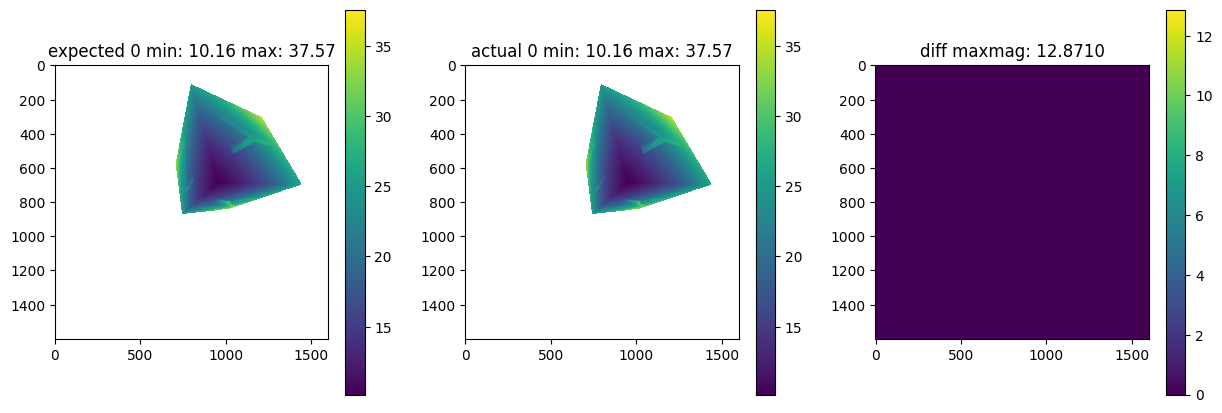

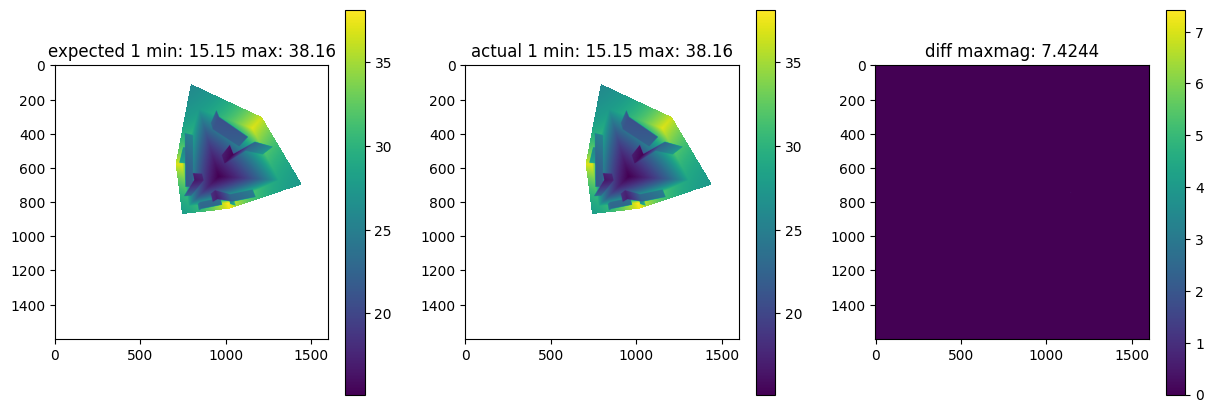

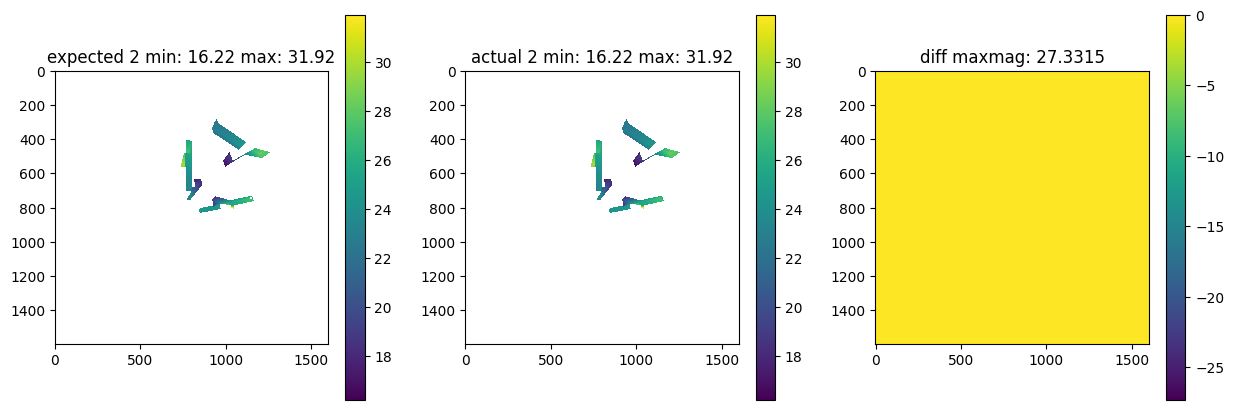

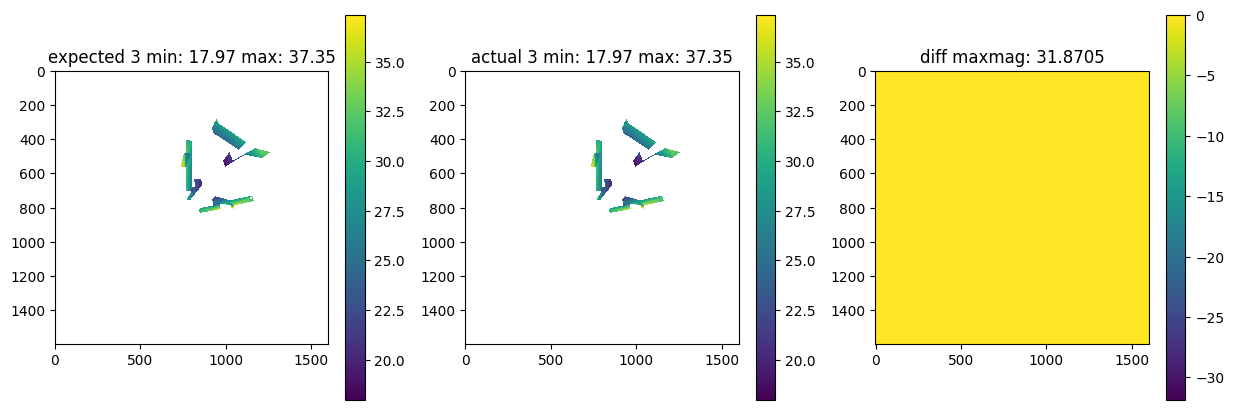

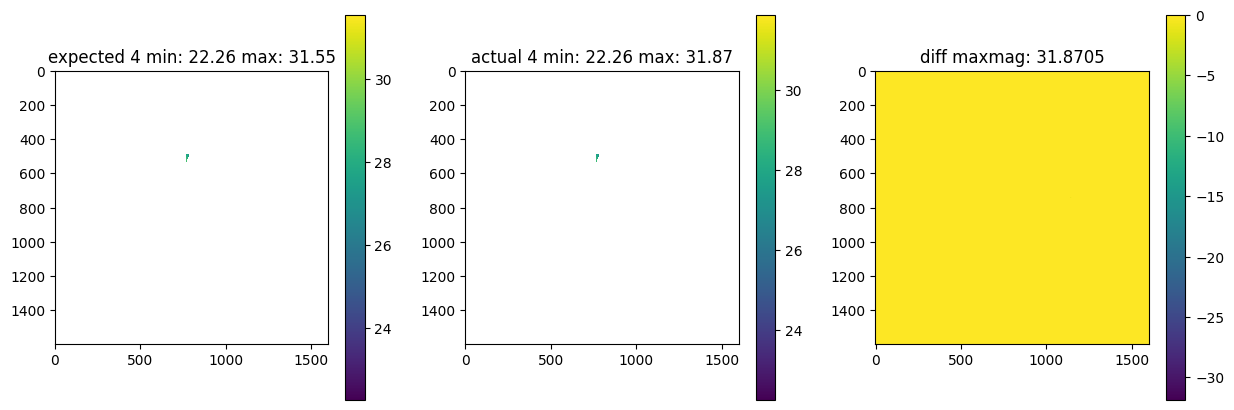

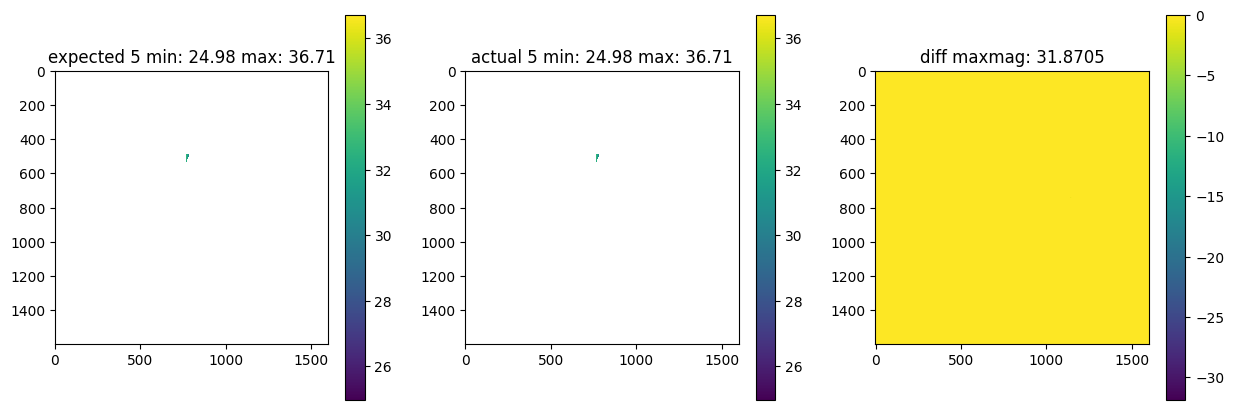

/tmp/ipykernel_808881/1288416476.py:3: RuntimeWarning: All-NaN slice encountered
  axs[0].set_title(f"expected {i} min: {np.nanmin(expected[:, :, i]):.2f} max: {np.nanmax(expected[:, :, i]):.2f}")
/tmp/ipykernel_808881/1288416476.py:5: RuntimeWarning: All-NaN slice encountered
  axs[1].set_title(f"actual {i} min: {np.nanmin(actual[:, :, i]):.2f} max: {np.nanmax(actual[:, :, i]):.2f}")


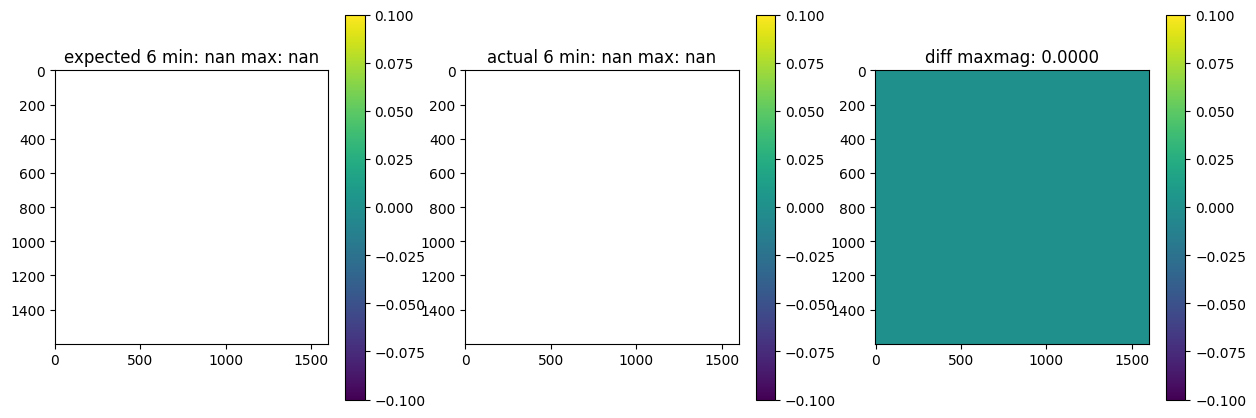

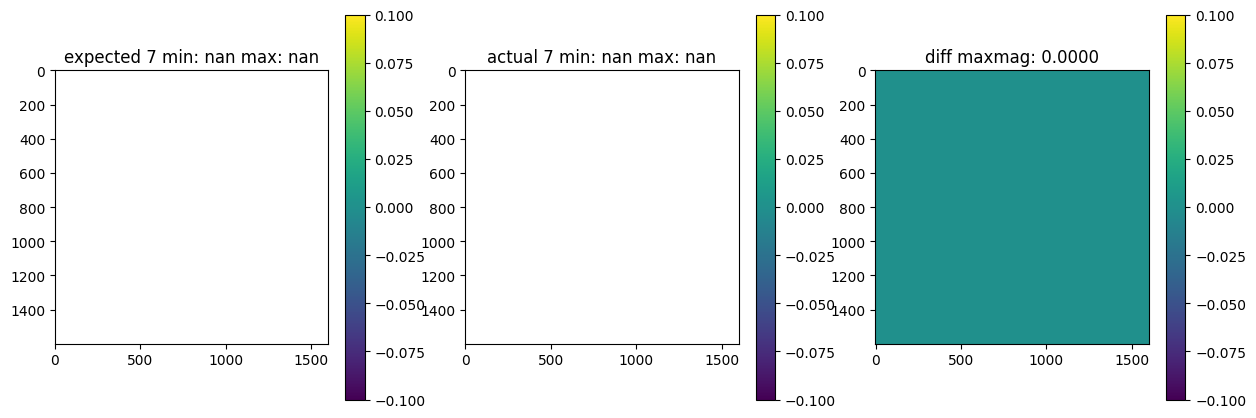

In [321]:
def plot_channel(i):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].set_title(f"expected {i} min: {np.nanmin(expected[:, :, i]):.2f} max: {np.nanmax(expected[:, :, i]):.2f}")
    axs[0].imshow(expected[:, :, i])
    axs[1].set_title(f"actual {i} min: {np.nanmin(actual[:, :, i]):.2f} max: {np.nanmax(actual[:, :, i]):.2f}")
    axs[1].imshow(actual[:, :, i])
    expected_no_nan = np.copy(expected[:, :, i])
    expected_no_nan[np.isnan(expected_no_nan)] = 0
    expected_no_nan[expected_no_nan == np.inf] = 0

    actual_no_nan = np.copy(actual[:, :, i])
    actual_no_nan[np.isnan(actual_no_nan)] = 0
    actual_no_nan[actual_no_nan == np.inf] = 0

    # axs[2].imshow(expected[:, :, i] - actual[:, :, i])
    diff = expected_no_nan - actual_no_nan
    axs[2].imshow(diff)
    axs[2].set_title(f"diff maxmag: {np.max(np.abs(diff)):.4f}")

    # colorbars
    fig.colorbar(axs[0].imshow(expected[:, :, i]), ax=axs[0])
    fig.colorbar(axs[1].imshow(actual[:, :, i]), ax=axs[1])
    fig.colorbar(axs[2].imshow(diff), ax=axs[2])
    plt.show()
    

for i in range(8):
# for i in range(expected.shape[2]):
    plot_channel(i)
